In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/lucaslattari/HistogramsAndBoxPlots/master/marvel_vs_dc.csv')
df.rename(columns = {"Rate": "IMDB Score", "Metascore": "Metacritc Score"}, inplace = True)

df["IMDB Score"] *= 10
df["IMDB Score"] = df["IMDB Score"].astype(int)
df["Budget"] = df["Budget"].astype(float)

# df = df.drop(df.columns[0], axis = 1)
df.drop(df.columns[0], axis = 1, inplace = True)

df.head()

,Original Title,Company,IMDB Score,Metacritc Score,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Iron Man,Marvel,79,79,126,2008,140000000.0,98618668,318604126,585366247
1,The Incredible Hulk,Marvel,67,61,112,2008,150000000.0,55414050,134806913,263427551
2,Iron Man 2,Marvel,70,57,124,2010,200000000.0,128122480,312433331,623933331
3,Thor,Marvel,70,57,115,2011,150000000.0,65723338,181030624,449326618
4,Captain America: The First Avenger,Marvel,69,66,124,2011,140000000.0,65058524,176654505,370569774


# Histogramas

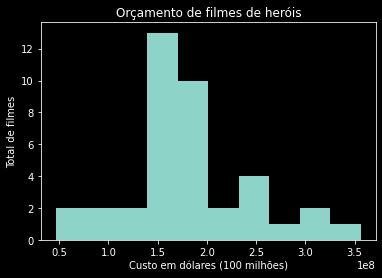

In [9]:
plt.style.use('dark_background')
df["Budget"].plot.hist()
# Por padrão são 10 agrupamentos
# Usando .....hist(bins = 20) ou mais ou menos, você altera o total

plt.title("Orçamento de filmes de heróis")
plt.xlabel("Custo em dólares (100 milhões)")
plt.ylabel("Total de filmes")

plt.show()

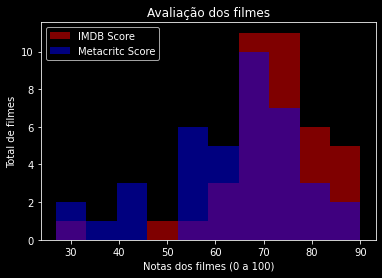

In [13]:
df[["IMDB Score", "Metacritc Score"]].plot.hist(bins = 10, color = ["red", "blue"], alpha = 0.5)
# color: as cores serão colocadas na ordem dos campos definidos
# alpha: transparência do histograma

plt.title("Avaliação dos filmes")
plt.xlabel("Notas dos filmes (0 a 100)")
plt.ylabel("Total de filmes")

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63b3ffd8d0>,
      dtype=object)

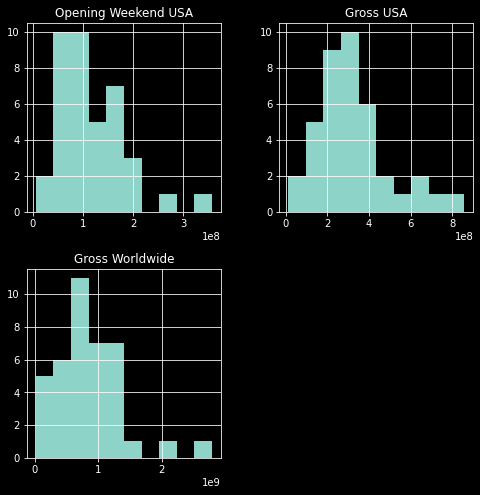

In [22]:
money_df = pd.DataFrame(df, columns = ["Opening Weekend USA", "Gross\xa0USA", "Gross Worldwide"])

f = plt.figure(figsize = (8,8))
ax = f.gca()

money_df.hist(ax = ax)

# Box Plost

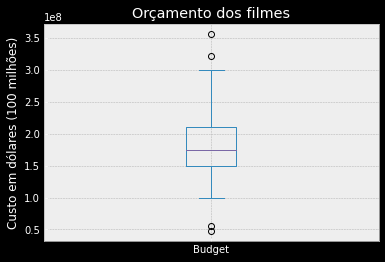

In [23]:
plt.style.use("bmh")
df["Budget"].plot.box(grid = True)

plt.title("Orçamento dos filmes")
plt.ylabel("Custo em dólares (100 milhões)")

plt.show()

In [25]:
df.describe().astype(int)

,IMDB Score,Metacritc Score,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
count,39,39,39,39,39,39,39
mean,72,63,2013,184102564,115109770,323265922,827572676
std,10,13,4,64410196,68667078,180708575,533231804
min,33,27,2004,47000000,5379365,10547117,10903312
25%,69,56,2011,150000000,65390931,203221666,484319291
50%,73,67,2015,175000000,96202337,318604126,746846894
75%,78,72,2017,210000000,155922453,408549171,1104658040
max,90,88,2019,356000000,357115007,858373000,2797800564


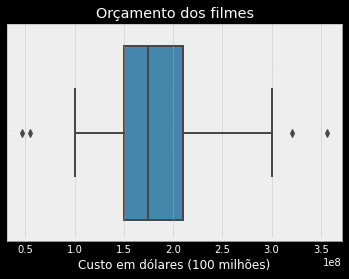

In [26]:
sns.boxplot(x = df["Budget"])

plt.title("Orçamento dos filmes")
plt.xlabel("Custo em dólares (100 milhões)")

plt.show()

In [27]:
is_min_outlier = df["Budget"] < 100000000

df[is_min_outlier]

,Original Title,Company,IMDB Score,Metacritc Score,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
28,Jonah Hex,DC,47,33,81,2010,47000000.0,5379365,10547117,10903312
38,Joker,DC,87,59,122,2019,55000000.0,96202337,333204580,1060504580


In [30]:
is_max_outlier = df["Budget"] > 300000000

df[is_max_outlier]

,Original Title,Company,IMDB Score,Metacritc Score,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
18,Avengers: Infinity War,Marvel,85,68,149,2018,321000000.0,257698183,678815482,2048359754
21,Avengers: Endgame,Marvel,85,78,181,2019,356000000.0,357115007,858373000,2797800564


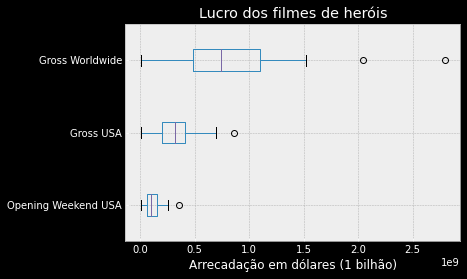

In [32]:
df[["Opening Weekend USA", "Gross\xa0USA", "Gross Worldwide"]].boxplot(vert = False)

plt.title("Lucro dos filmes de heróis")
plt.xlabel("Arrecadação em dólares (1 bilhão)")

plt.show()

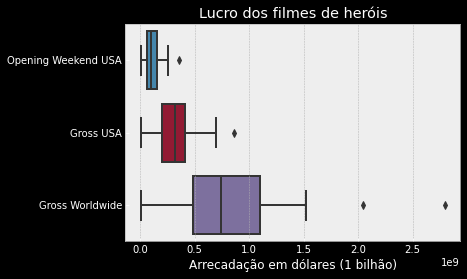

In [35]:
sns.boxplot(data = df[["Opening Weekend USA", "Gross\xa0USA", "Gross Worldwide"]], orient = 'h')

plt.title("Lucro dos filmes de heróis")
plt.xlabel("Arrecadação em dólares (1 bilhão)")

plt.show()

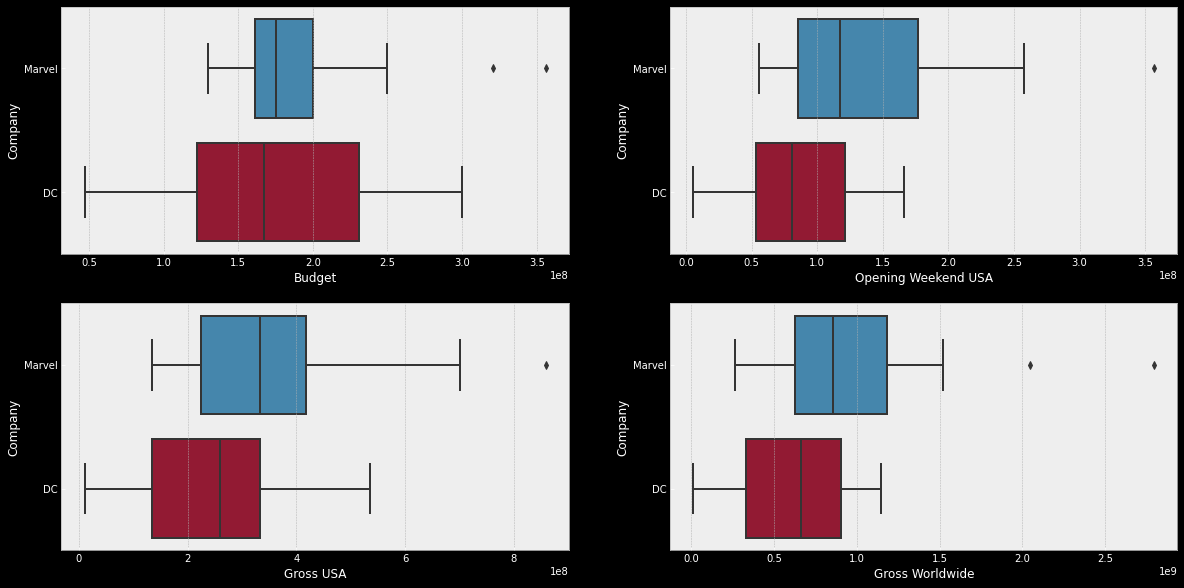

In [44]:
fig, axes = plt.subplots(2, 2, figsize = (20,10))

sns.boxplot(x = "Budget", y = "Company", data = df, ax = axes[0, 0])
sns.boxplot(x = "Opening Weekend USA", y = "Company", data = df, ax = axes[0, 1])
sns.boxplot(x = "Gross\xa0USA", y = "Company", data = df, ax = axes[1, 0])
sns.boxplot(x = "Gross Worldwide", y = "Company", data = df, ax = axes[1, 1])


plt.show()